In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [34]:
# from using_kde.precision_recall import plot_precision as kde_precision, plot_recall as kde_recall
from using_kde import precision_recall

In [33]:
import importlib
importlib.reload(precision_recall)

<module 'using_kde.precision_recall' from 'C:\\Users\\Vladimir\\PycharmProjects\\StatProject\\using_kde\\precision_recall.py'>

In [4]:
n = 1000
act = np.linspace(0, 1, num=n) + stats.norm.rvs(loc=0.0, scale=0.1, size=n)
pred = np.linspace(0, 1, num=n)

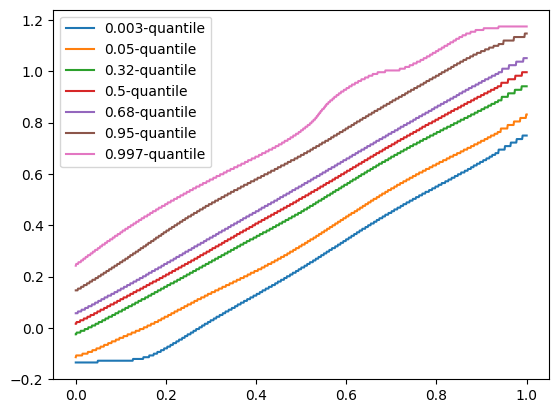

In [5]:
precision_recall.plot_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.003, 0.05, 0.32, 0.5, 0.68, 0.95, 0.997])

30.2 s ± 255 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


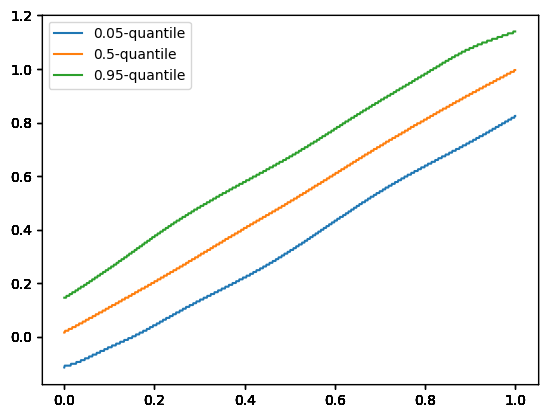

In [36]:
%timeit precision_recall.plot_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95])

In [7]:
import cProfile
import pstats

         4772633 function calls (4673702 primitive calls) in 9.654 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    96272    3.828    0.000    5.722    0.000 C:\Users\Vladimir\PycharmProjects\StatProject\Env\Lib\site-packages\scipy\linalg\_basic.py:268(solve_triangular)
    48136    2.572    0.000    9.175    0.000 C:\Users\Vladimir\PycharmProjects\StatProject\Env\Lib\site-packages\scipy\stats\_kde.py:234(evaluate)
   192544    0.453    0.000    1.691    0.000 C:\Users\Vladimir\PycharmProjects\StatProject\Env\Lib\site-packages\scipy\_lib\_util.py:206(_asarray_validated)
   192545    0.448    0.000    1.075    0.000 C:\Users\Vladimir\PycharmProjects\StatProject\Env\Lib\site-packages\numpy\lib\function_base.py:562(asarray_chkfinite)
   192581    0.443    0.000    0.443    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    48136    0.139    0.000    0.332    0.000 C:\Users\Vladimir\PycharmProjects\StatProject\Env\Lib\site

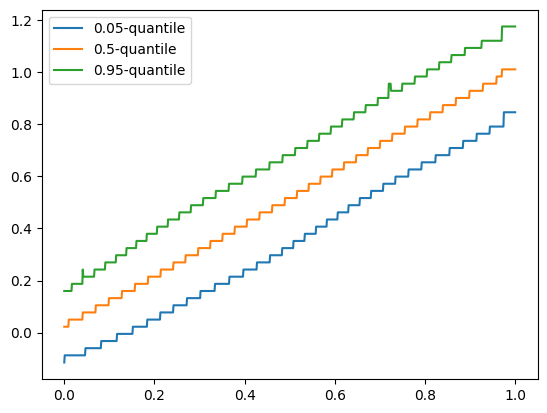

In [20]:
with cProfile.Profile() as prof:
    precision_recall.plot_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95])

st = pstats.Stats(prof)
st.sort_stats(pstats.SortKey.TIME)
st.print_stats()
st.dump_stats('stats2.prof')

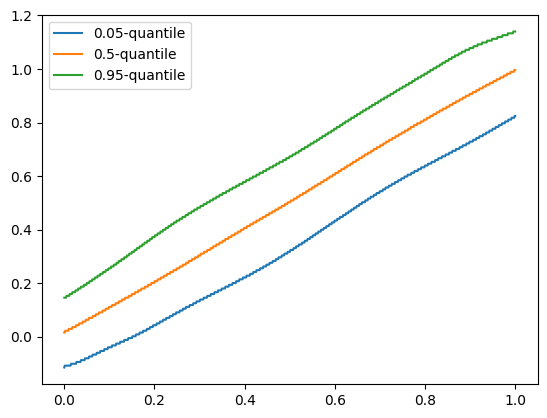

In [35]:
precision_recall.plot_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95])

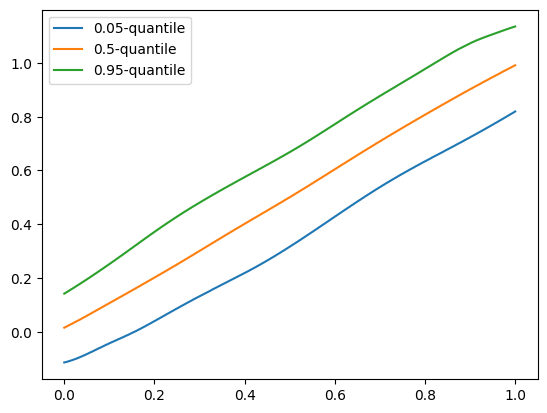

In [31]:
precision_recall.plot_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95])